In [170]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [171]:
url = 'https://en.wikipedia.org/wiki/North_Carolina'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html.read())



all_collapsible_tables = soup.find_all('table', class_="wikitable collapsible")
right_table = all_collapsible_tables[0]
right_table

# print contents of the table
print(table.prettify())



<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
 <tbody>
  <tr>
   <th colspan="14">
    Climate data for North Carolina
   </th>
  </tr>
  <tr>
   <th scope="row">
    Month
   </th>
   <th scope="col">
    Jan
   </th>
   <th scope="col">
    Feb
   </th>
   <th scope="col">
    Mar
   </th>
   <th scope="col">
    Apr
   </th>
   <th scope="col">
    May
   </th>
   <th scope="col">
    Jun
   </th>
   <th scope="col">
    Jul
   </th>
   <th scope="col">
    Aug
   </th>
   <th scope="col">
    Sep
   </th>
   <th scope="col">
    Oct
   </th>
   <th scope="col">
    Nov
   </th>
   <th scope="col">
    Dec
   </th>
   <th scope="col" style="border-left-width:medium">
    Year
   </th>
  </tr>
  <tr style="text-align: center;">
   <th scope="row" style="height: 16px;">
    Record high °F (°C)
   </th>
   <td style="background: #FF4F00; color:#000000;">
    86
    <br/>
    (30)
   </td>
   <td style="background: #FF4100;

In [172]:
# get the rows of the table by identifying 'tr' elements
rows = table.findAll('tr')

# iterate over rows to identify number of columns in each by identifying 'td' elements
for row in rows:
    column=row.find_all('td')
    print("Number of Columns:", len(column))

# iterate over rows to print contents of the cells
for row in rows:
    row_titles=row.find_all('th')
    column=row.find_all('td')
    print()
    print("Row", rows.index(row))
    for title in row_titles:
        print(title.get_text(' ', strip=True))
    for cell in column:
        print(cell.get_text(' ', strip=True))

Number of Columns: 0
Number of Columns: 0
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 1
Number of Columns: 1

Row 0
Climate data for North Carolina

Row 1
Month
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
Year

Row 2
Record high °F (°C)
86 (30)
90 (32)
100 (38)
102 (39)
107 (42)
108 (42)
109 (43)
110 (43)
109 (43)
102 (39)
90 (32)
87 (31)
110 (43)

Row 3
Average high °F (°C)
49.9 (9.9)
53.7 (12.1)
61.8 (16.6)
71.0 (21.7)
78.1 (25.6)
85.2 (29.6)
88.1 (31.2)
86.8 (30.4)
80.8 (27.1)
71.6 (22.0)
62.5 (16.9)
52.5 (11.4)
70.2 (21.2)

Row 4
Daily mean °F (°C)
39.2 (4.0)
42.3 (5.7)
49.5 (9.7)
58.1 (14.5)
66.1 (18.9)
74.1 (23.4)
77.5 (25.3)
76.3 (24.6)
69.9 (21.1)
59.4 (15.2)
50.4 (10.2)
41.7 (5.4)
58.7 (14.8)

Row 5
Average low °F (°C)
28.4 (−2.0)
30.9 (−0.6)
37.2 (2.9)
45.2 (7.3)
54.0 (12.2)
63.0 (17.2)
66.8 (19.3)
65.8 (18.8)
58.9 (14.9)
47.2 (8.4)
38.3 (3.5)
3

In [173]:
# import regex
import re

# lists
periods = []
average_high_f = []
average_low_f = []
average_high_c = []
average_low_c = []

# store data
for row in rows:
    row_titles=row.find_all('th')
    #row 0 is useless
    if rows.index(row) == 0:
        for title in row_titles:
            table_title = title.get_text(' ', strip=True)
    # row 1 contains months
    elif rows.index(row) == 1:
        for title in row_titles:
            if row_titles.index(title) != 0:
                periods.append(title.get_text(' ', strip=True))
    # rows 3 and 5 contain the data we need
    elif rows.index(row) <= 8:
        column=row.find_all('td')
        for cell in column:
            # data in single cell is both imperial metric
            temp_combined = cell.get_text(' ', strip=True)
            # divide the data from the cell between imperial and metric
            imperial, metric = temp_combined.split(' ')
            # remove extraneous characters
            metric = re.sub(r'[()]', '', metric)
            imperial = imperial.replace(' ','').replace(',','').replace("−", "-")
            metric = metric.replace(' ','').replace(',','').replace("−", "-")
            # convert string to float
            imperial = float(imperial)
            metric = float(metric)
            # store the data
            if rows.index(row) == 3:
                average_high_f.append(imperial)
                average_high_c.append(metric)
            elif rows.index(row) == 5:
                average_low_f.append(imperial)
                average_low_c.append(metric)
           
                
                


In [174]:
#Basic table for the gathered data to enable checking the graph for inaccuracies

import pandas as pd

df = pd.DataFrame(periods,columns=['Month'])
df['Average High °F'] = average_high_f
df['Average High °C'] = average_high_c
df['Average Low °F'] = average_low_f
df['Average Low °C'] = average_low_c
months = df.drop([12])
months

,Month,Average High °F,Average High °C,Average Low °F,Average Low °C
0,Jan,49.9,9.9,28.4,-2.0
1,Feb,53.7,12.1,30.9,-0.6
2,Mar,61.8,16.6,37.2,2.9
3,Apr,71.0,21.7,45.2,7.3
4,May,78.1,25.6,54.0,12.2
5,Jun,85.2,29.6,63.0,17.2
6,Jul,88.1,31.2,66.8,19.3
7,Aug,86.8,30.4,65.8,18.8
8,Sep,80.8,27.1,58.9,14.9
9,Oct,71.6,22.0,47.2,8.4


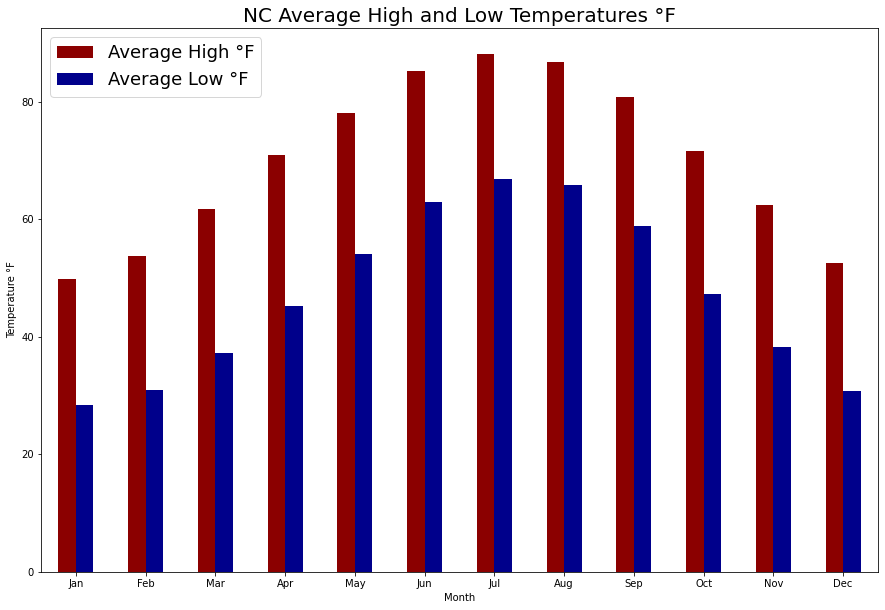

In [175]:
#Formatting setup
xtick_range = range(0,len(months))
xtick_labels = periods

#Graph to display High and Low temp data in fahrenheit
months[["Average High °F", "Average Low °F"]].plot(kind="bar", color = ["darkred", "darkblue"], figsize=(15,10))
plt.xticks(ticks=xtick_range, labels=xtick_labels, rotation = 0)
plt.title("NC Average High and Low Temperatures °F", fontsize = 20)
plt.legend(loc="upper left", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Temperature °F")

plt.show()

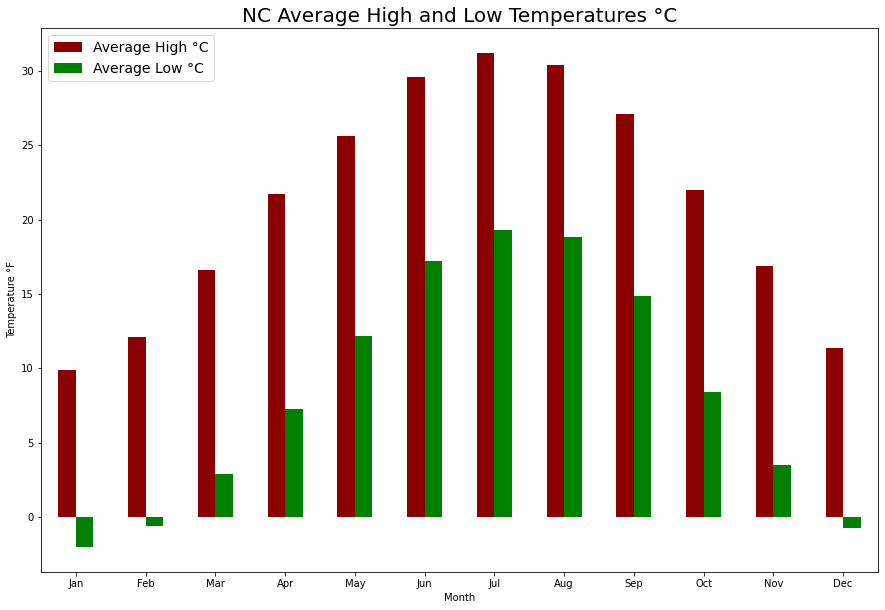

In [176]:
#Graph to display High and Low temp data in celcius
months[["Average High °C", "Average Low °C"]].plot(kind="bar", color = [ "darkred", "green"], figsize=(15,10))
plt.xticks(ticks=xtick_range, labels=xtick_labels, rotation = 0)
plt.title("NC Average High and Low Temperatures °C", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.show()